In [14]:
import rubin_sim
from rubin_sim import maf
import matplotlib.pylab as plt
%matplotlib inline
import healpy as hp
import numpy as np
from rubin_sim.scheduler.utils import Sky_area_generator
from rubin_sim.utils import raDec2Hpid

In [2]:
filename = 'baseline_v2.2_10yrs.db'
runname = filename.split('/')[-1].replace('.db', '')

In [3]:
bins = np.arange(0,3653, 20)
# Make a map over the whole sky
slicer = maf.HealpixSlicer()
# just count how many observations overlap the point
metric = maf.AccumulateM5Metric(bins=bins)
# limit the data to just things on one night
sql='filter="r" and note not like "%%DD%%" '
bundle = maf.MetricBundle(metric, slicer, sql, runName=runname)
bg = maf.MetricBundleGroup([bundle], filename, '.', None)


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [4]:
bg.runAll()
baseline_depths = bundle.metricValues.copy()

Querying table None with constraint filter="r" and note not like "%%DD%%"  for columns ['fieldRA', 'fieldDec', 'night', 'fiveSigmaDepth', 'rotSkyPos']
Found 441881 visits
Running:  ['baseline_v2_2_10yrs_AccumulateM5Metric_r_and_note_not_like_DD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [5]:
filename = 'noroll_v2.2_10yrs.db'
runname = filename.split('/')[-1].replace('.db', '')
bins = np.arange(0,3653, 20)
# Make a map over the whole sky
slicer = maf.HealpixSlicer()
# just count how many observations overlap the point
metric = maf.AccumulateM5Metric(bins=bins)
# limit the data to just things on one night
sql='filter="r" and note not like "%%DD%%" '
bundle = maf.MetricBundle(metric, slicer, sql, runName=runname)
bg = maf.MetricBundleGroup([bundle], filename, '.', None)
bg.runAll()

noroll_depths =  bundle.metricValues.copy()

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying table None with constraint filter="r" and note not like "%%DD%%"  for columns ['fieldRA', 'fieldDec', 'night', 'fiveSigmaDepth', 'rotSkyPos']
Found 440961 visits
Running:  ['noroll_v2_2_10yrs_AccumulateM5Metric_r_and_note_not_like_DD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [6]:
nside=128
sm = Sky_area_generator(nside=nside)
footprints_hp_array, labels = sm.return_maps()
wfd_indx = np.where((labels == 'lowdust') | (labels == 'LMC_SMC') | (labels == 'virgo'))[0]
mask = np.zeros(labels.size, dtype=float) + np.nan
mask[wfd_indx] = 1

baseline_depths *= mask[:,np.newaxis]
noroll_depths *= mask[:,np.newaxis]


baseline_depths.mask = True
baseline_depths.mask[wfd_indx] = False

noroll_depths.mask = True
noroll_depths.mask[wfd_indx] = False


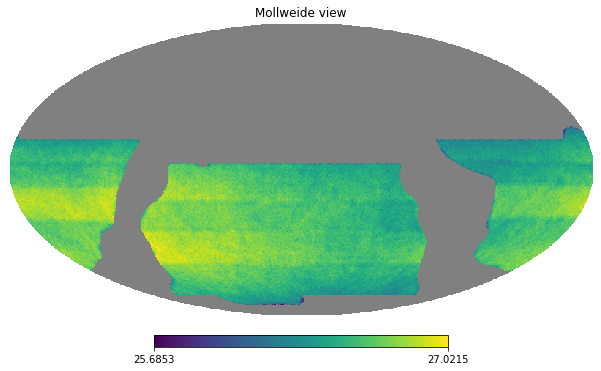

In [7]:
hp.mollview(baseline_depths[:,100])

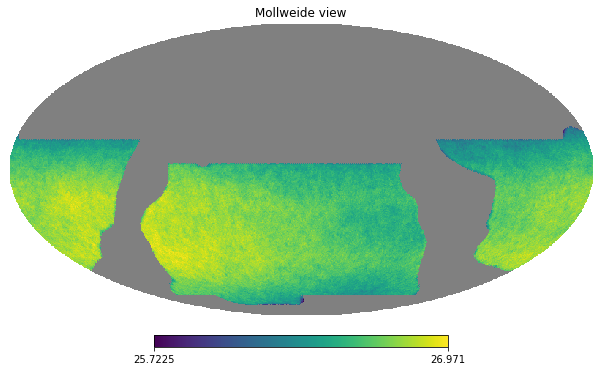

In [8]:
hp.mollview(noroll_depths[:,100])

In [9]:
bins[100]/365

5.47945205479452

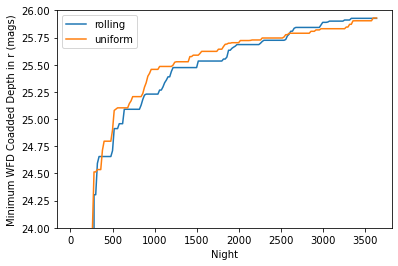

In [10]:
plt.plot(bins[1:], np.nanmin(baseline_depths, axis=0), label='rolling')
plt.plot(bins[1:], np.nanmin(noroll_depths, axis=0), label='uniform')

plt.xlabel('Night')
plt.ylabel('Minimum WFD Coadded Depth in r (mags)')
plt.legend()
plt.ylim([24,26])
plt.savefig('min_wfd.png')

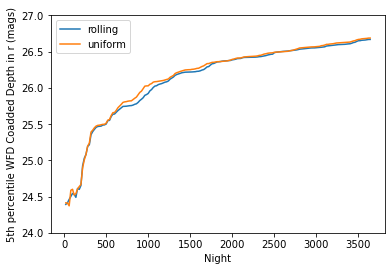

In [11]:
centile = 5

temp = baseline_depths.data
temp[np.where(temp <= 0)] = np.nan

plt.plot(bins[1:], np.nanpercentile(temp, centile, axis=0), label='rolling')

temp = noroll_depths.data
temp[np.where(temp <= 0)] = np.nan

plt.plot(bins[1:], np.nanpercentile(temp, centile, axis=0), label='uniform')

plt.xlabel('Night')
plt.ylabel('%ith percentile WFD Coadded Depth in r (mags)' % centile)
plt.legend()
plt.ylim([24,27])
plt.savefig('5th_wfd.png')

(25.0, 27.5)

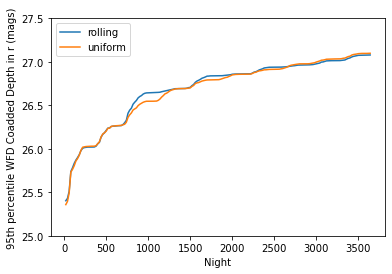

In [12]:
centile = 95

temp = baseline_depths.data
temp[np.where(temp <= 0)] = np.nan

plt.plot(bins[1:], np.nanpercentile(temp, centile, axis=0), label='rolling')

temp = noroll_depths.data
temp[np.where(temp <= 0)] = np.nan

plt.plot(bins[1:], np.nanpercentile(temp, centile, axis=0), label='uniform')

plt.xlabel('Night')
plt.ylabel('%ith percentile WFD Coadded Depth in r (mags)' % centile)
plt.legend()
plt.ylim([25,27.5])

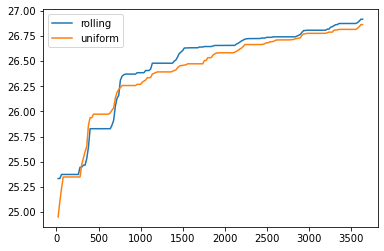

In [24]:
# Let's look at a single healpixel
indx = raDec2Hpid(nside, 0,-10,)
plt.plot(bins[1:], baseline_depths[indx,:], label='rolling')
plt.plot(bins[1:], noroll_depths[indx,:], label='uniform')
plt.legend()

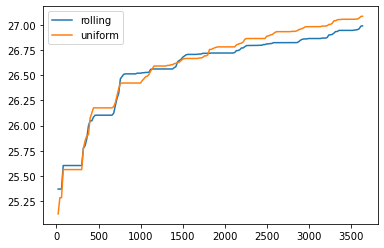

In [25]:
# Let's look at a single healpixel
indx = raDec2Hpid(nside, 0,-40)
plt.plot(bins[1:], baseline_depths[indx,:], label='rolling')
plt.plot(bins[1:], noroll_depths[indx,:], label='uniform')
plt.legend()